AWS Deployments & Managing Infrastructure At Scale

O que é o CloudFormation

    O CloudFormation é uma forma declarativa de descrever a infraestrutura da sua AWS, para quaisquer recursos (a maioria deles é suportada).

    Por exemplo, dentro de um modelo do CloudFormation, você declara:
    Eu quero um grupo de segurança
    Eu quero duas instâncias EC2 usando esse grupo de segurança
    Eu quero um bucket S3
    Eu quero um balanceador de carga (ELB) na frente dessas máquinas
    Então, o CloudFormation cria esses recursos para você, na ordem correta, com a configuração exata que você especifica.

Benefícios do AWS CloudFormation (1/2)

    • Infraestrutura como código
        • Nenhum recurso é criado manualmente, o que é excelente para controle
        • As alterações na infraestrutura são revisadas por meio de código

    • Custo
        • Cada recurso dentro da pilha é marcado com um identificador para que você possa ver facilmente quanto custa uma pilha
        • Você pode estimar os custos de seus recursos usando o modelo CloudFormation
        • Estratégia de economia: No ambiente de desenvolvimento, você pode automatizar a exclusão de modelos às 17h e recriá-los com segurança às 8h da manhã

    • Produtividade
        • Capacidade de destruir e recriar uma infraestrutura na nuvem instantaneamente
        • Geração automatizada de diagrama para seus modelos!
        • Programação declarativa (sem necessidade de descobrir a ordem e orquestração)

    • Não reinvente a roda
        • Aproveite os modelos existentes na web!
        • Aproveite a documentação

    • Suporta (quase) todos os recursos da AWS:
        • Tudo o que veremos neste curso é suportado
        • Você pode usar "recursos personalizados" para recursos que não são suportados.

CloudFormation Stack Designer

    Example: 
        • WordPress CloudFormation Stack
        • We can see all the resources
        • We can see the relations between the components 
    
Ele é muito quando queremos repetir nossa infraestrutura para diferentes regiões, assim você só reproveita o código para criar toda a infra de outra região. Você pode usar o código de uma conta em outra se for o caso...

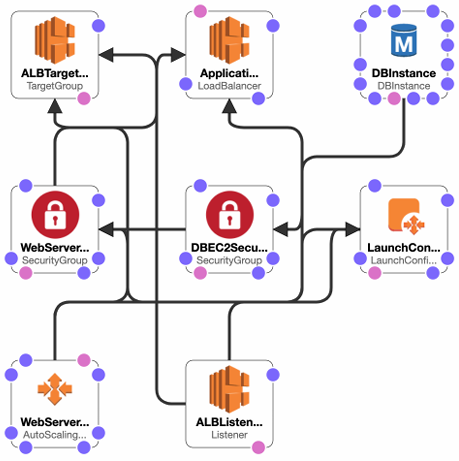


Para criar um CloudFormation, você deve ir no menu da esquerda, e e enviar o arquivo do com as configurações do Cloud Formation. Lembrando, deve ser YML ou Json



















































































































































































































